# Red Wine Quality (Classification)

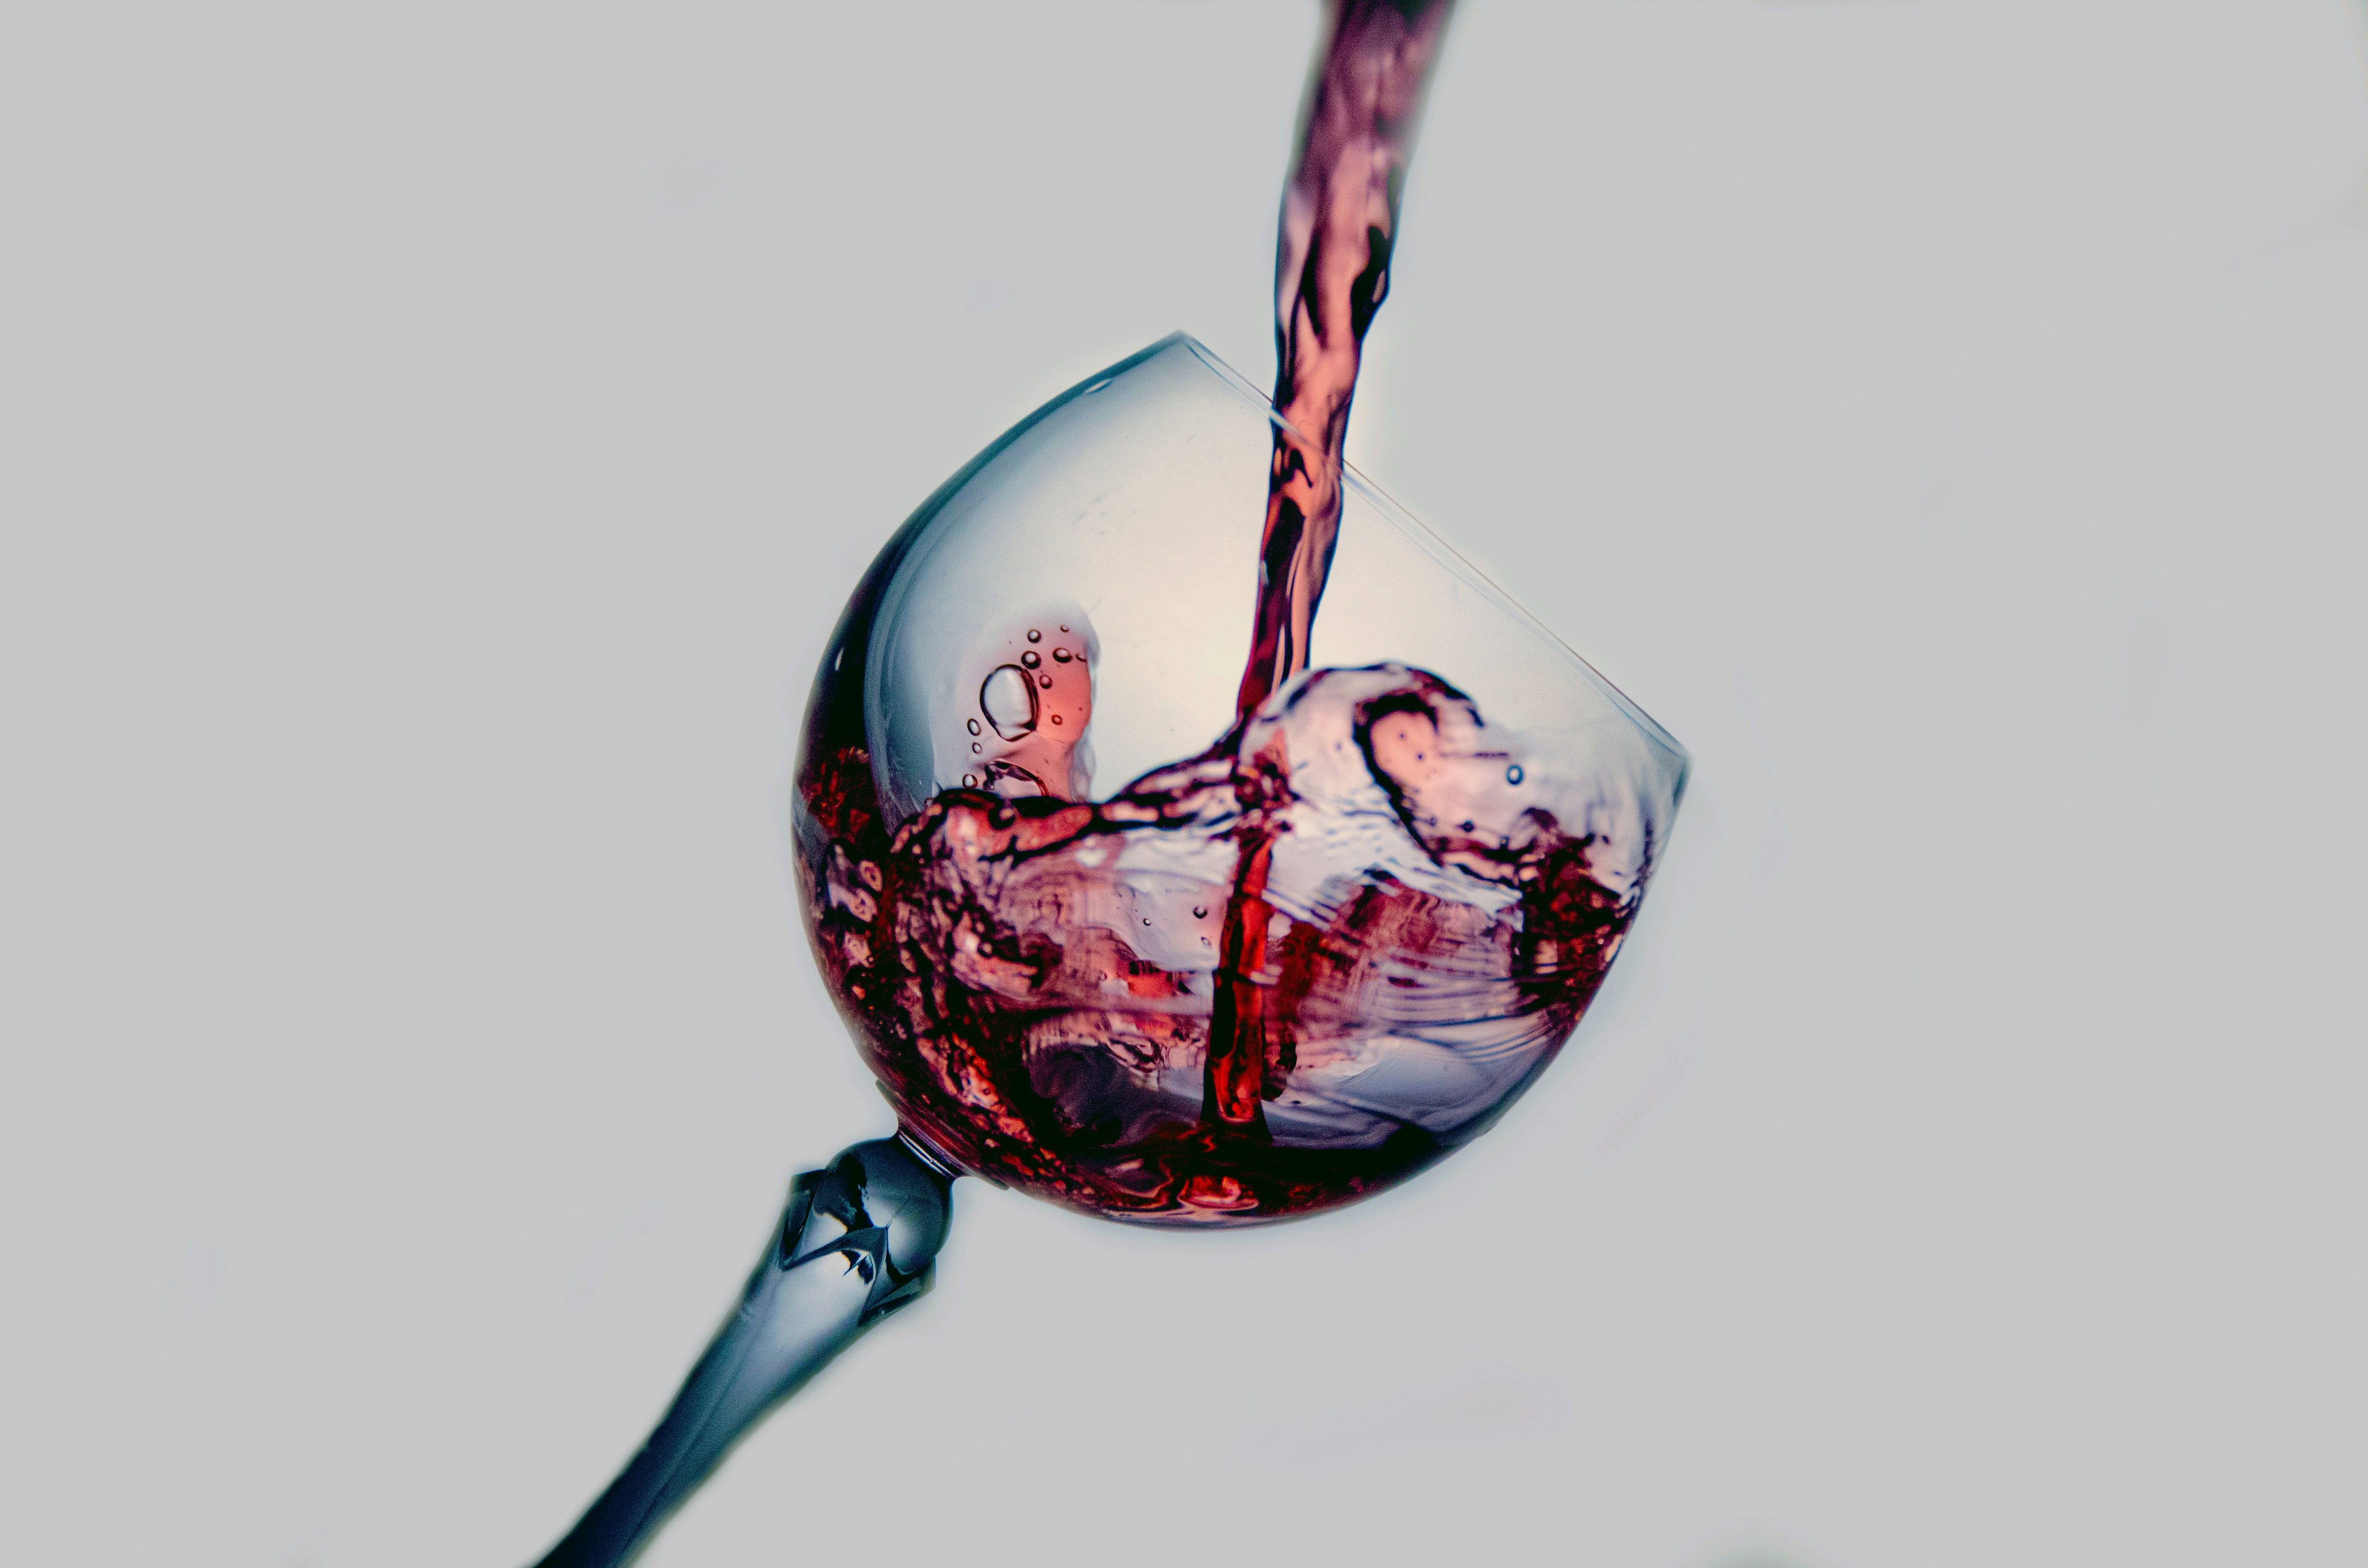

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn  import preprocessing
from sklearn.preprocessing import StandardScaler
# train_test_split
from sklearn.model_selection import train_test_split
# sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# sklearn model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

The data is taken from Kaggle. This dataset is also available on the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality 

In [2]:
wine_data = pd.read_csv("C:/Users/leebr/OneDrive/Desktop/Universityof_colorado/University Of Colorado-20240608T100451Z-001/University Of Colorado/Machine_learning/winequality-red.csv",delimiter  = ";")

In [3]:
wine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Data Wrangling

1. Identify and calculate the percentage of the missing values in each attribute.

In [4]:
print(wine_data.isnull().sum()/len(wine_data)*100)


fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64


2. Identify which columns are numerical and categorical.

In [5]:
print(wine_data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


## Exploratory Data Analysis Methods

1. Visualize feature and target distribution in the dataset using histogram

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

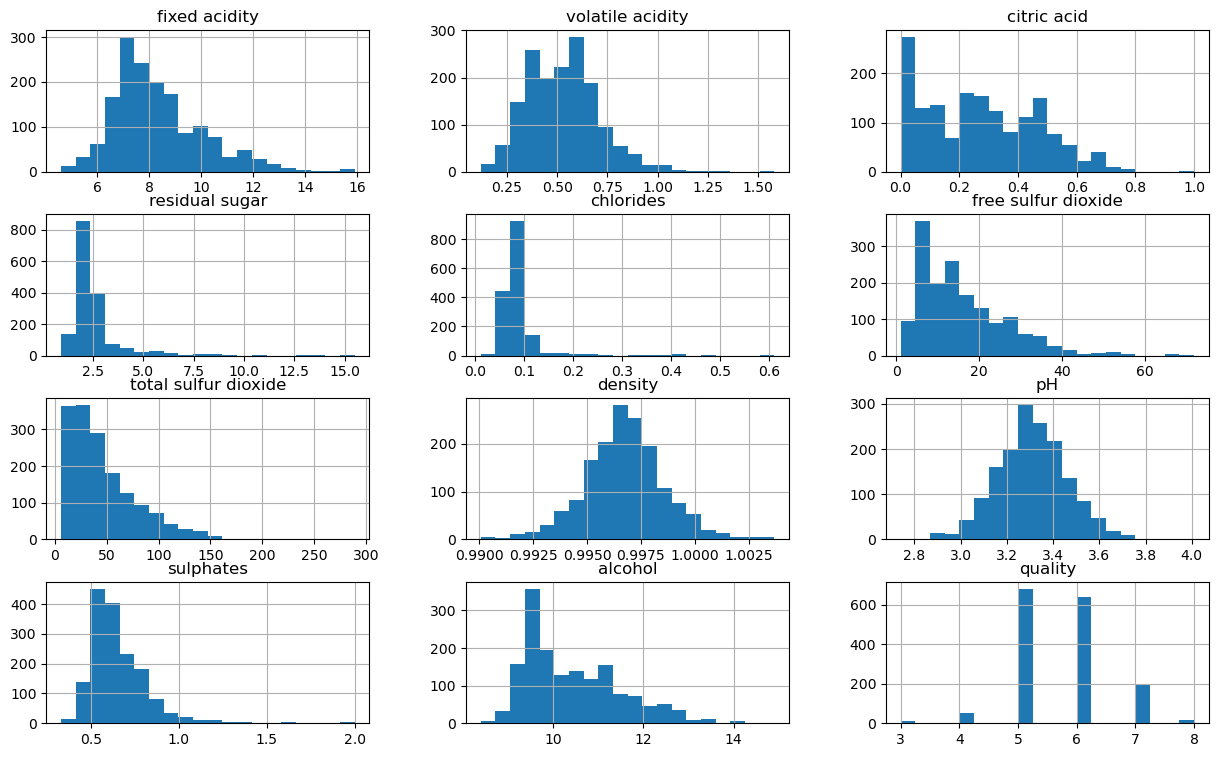

In [10]:
# visualize feature distribution
wine_data.hist(figsize = (15,9),bins = 20)

2. Using *`.value_counts()`* on **`quality`** variable to evaluate the counts in different quality of wine in the dataset.

In [11]:
# .value_counts()
wine_data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Result: the quality score 5 & 6 has more number of sample in the dataset

2. Correlation Heatmap 



There is strong relationship with wine quality, these features have a   direct impact on wine taste, preservation, and overall quality.

Relationship between features.
1. Alcohol VS Wine Quality
2. Volitile Acidity VS Wine Quality
3. Citric Acid VS Wine Quality

Text(0.5, 1.0, 'Feature Correlation Heatmap')

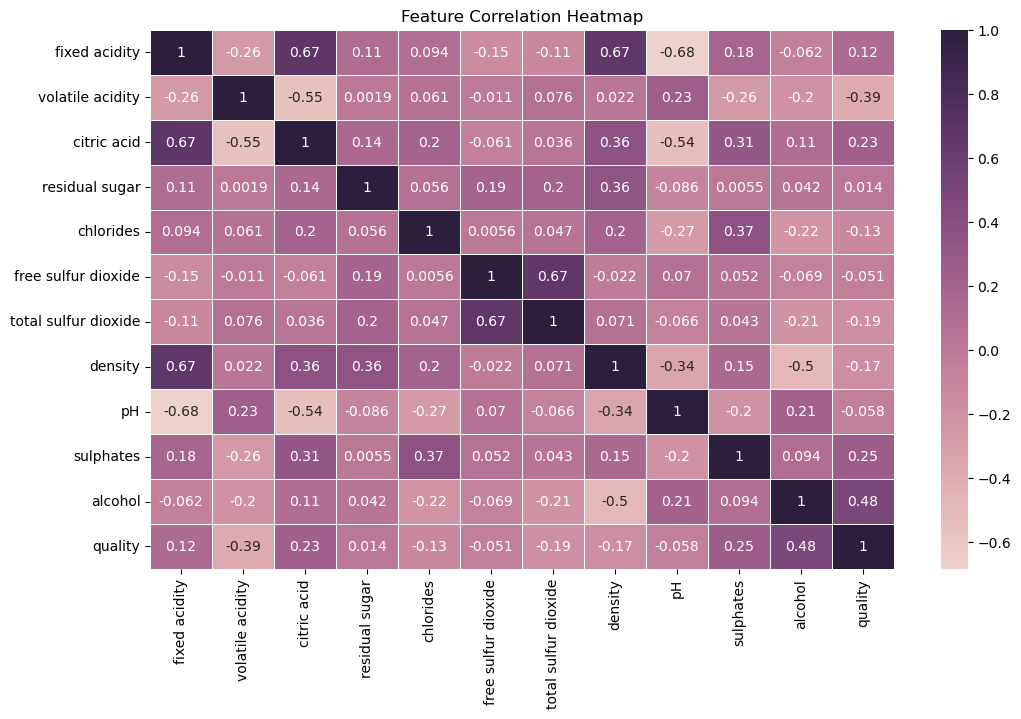

In [29]:
plt.figure(figsize = (12,7))
sns.heatmap(wine_data.corr(), annot =True, cmap = sns.cubehelix_palette(as_cmap=True),linecolor='white'
           ,linewidths=0.5)
plt.title("Feature Correlation Heatmap")

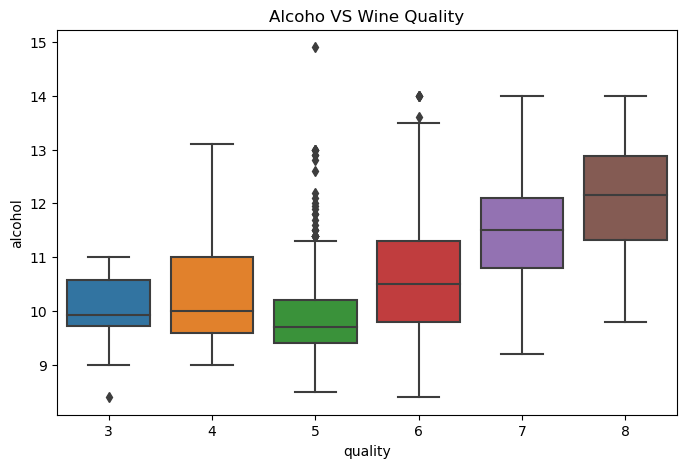

In [30]:
#1.Alcohol VS Wine Quality
# Higher Alcohol better quality
plt.figure(figsize = (8,5))
sns.boxplot(x = 'quality', y = 'alcohol', data = wine_data)
plt.title("Alcoho VS Wine Quality")
plt.show()

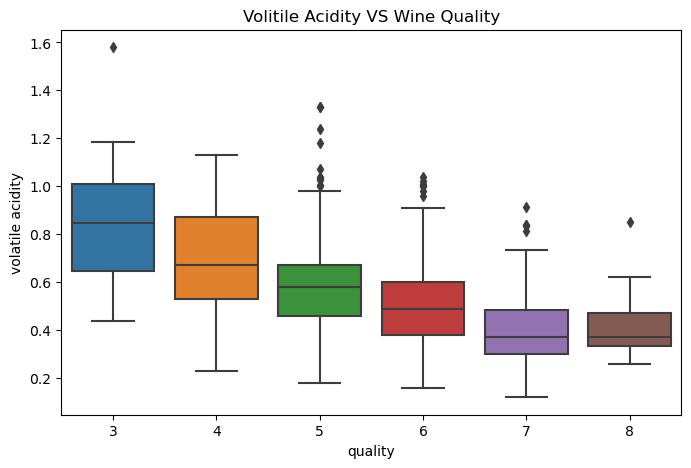

In [31]:
#2. Volitile Acidity VS Wine Quality
# higher acidity = worse quality
plt.figure(figsize = (8,5))
sns.boxplot(x = 'quality', y = 'volatile acidity', data = wine_data)
plt.title("Volitile Acidity VS Wine Quality")
plt.show()

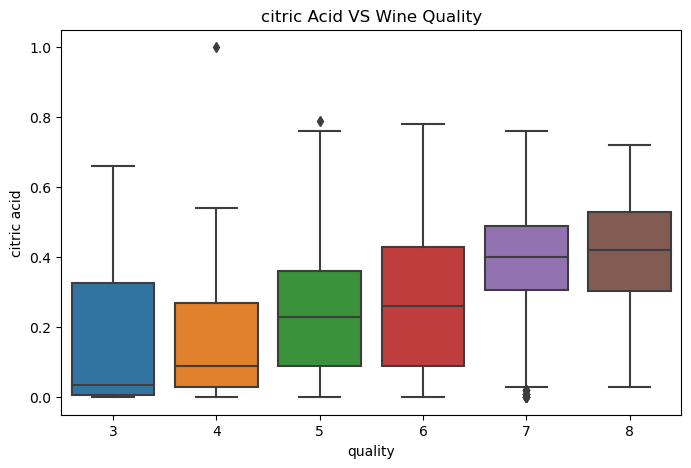

In [32]:
#3. Volitile Acidity VS Wine Quality
# Balance citric acid improve quality
plt.figure(figsize = (8,5))
sns.boxplot(x = 'quality', y = 'citric acid', data = wine_data)
plt.title("citric Acid VS Wine Quality")
plt.show()

3. Pair plot

The using pairplot from seaborn lib to see the interaction between features.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


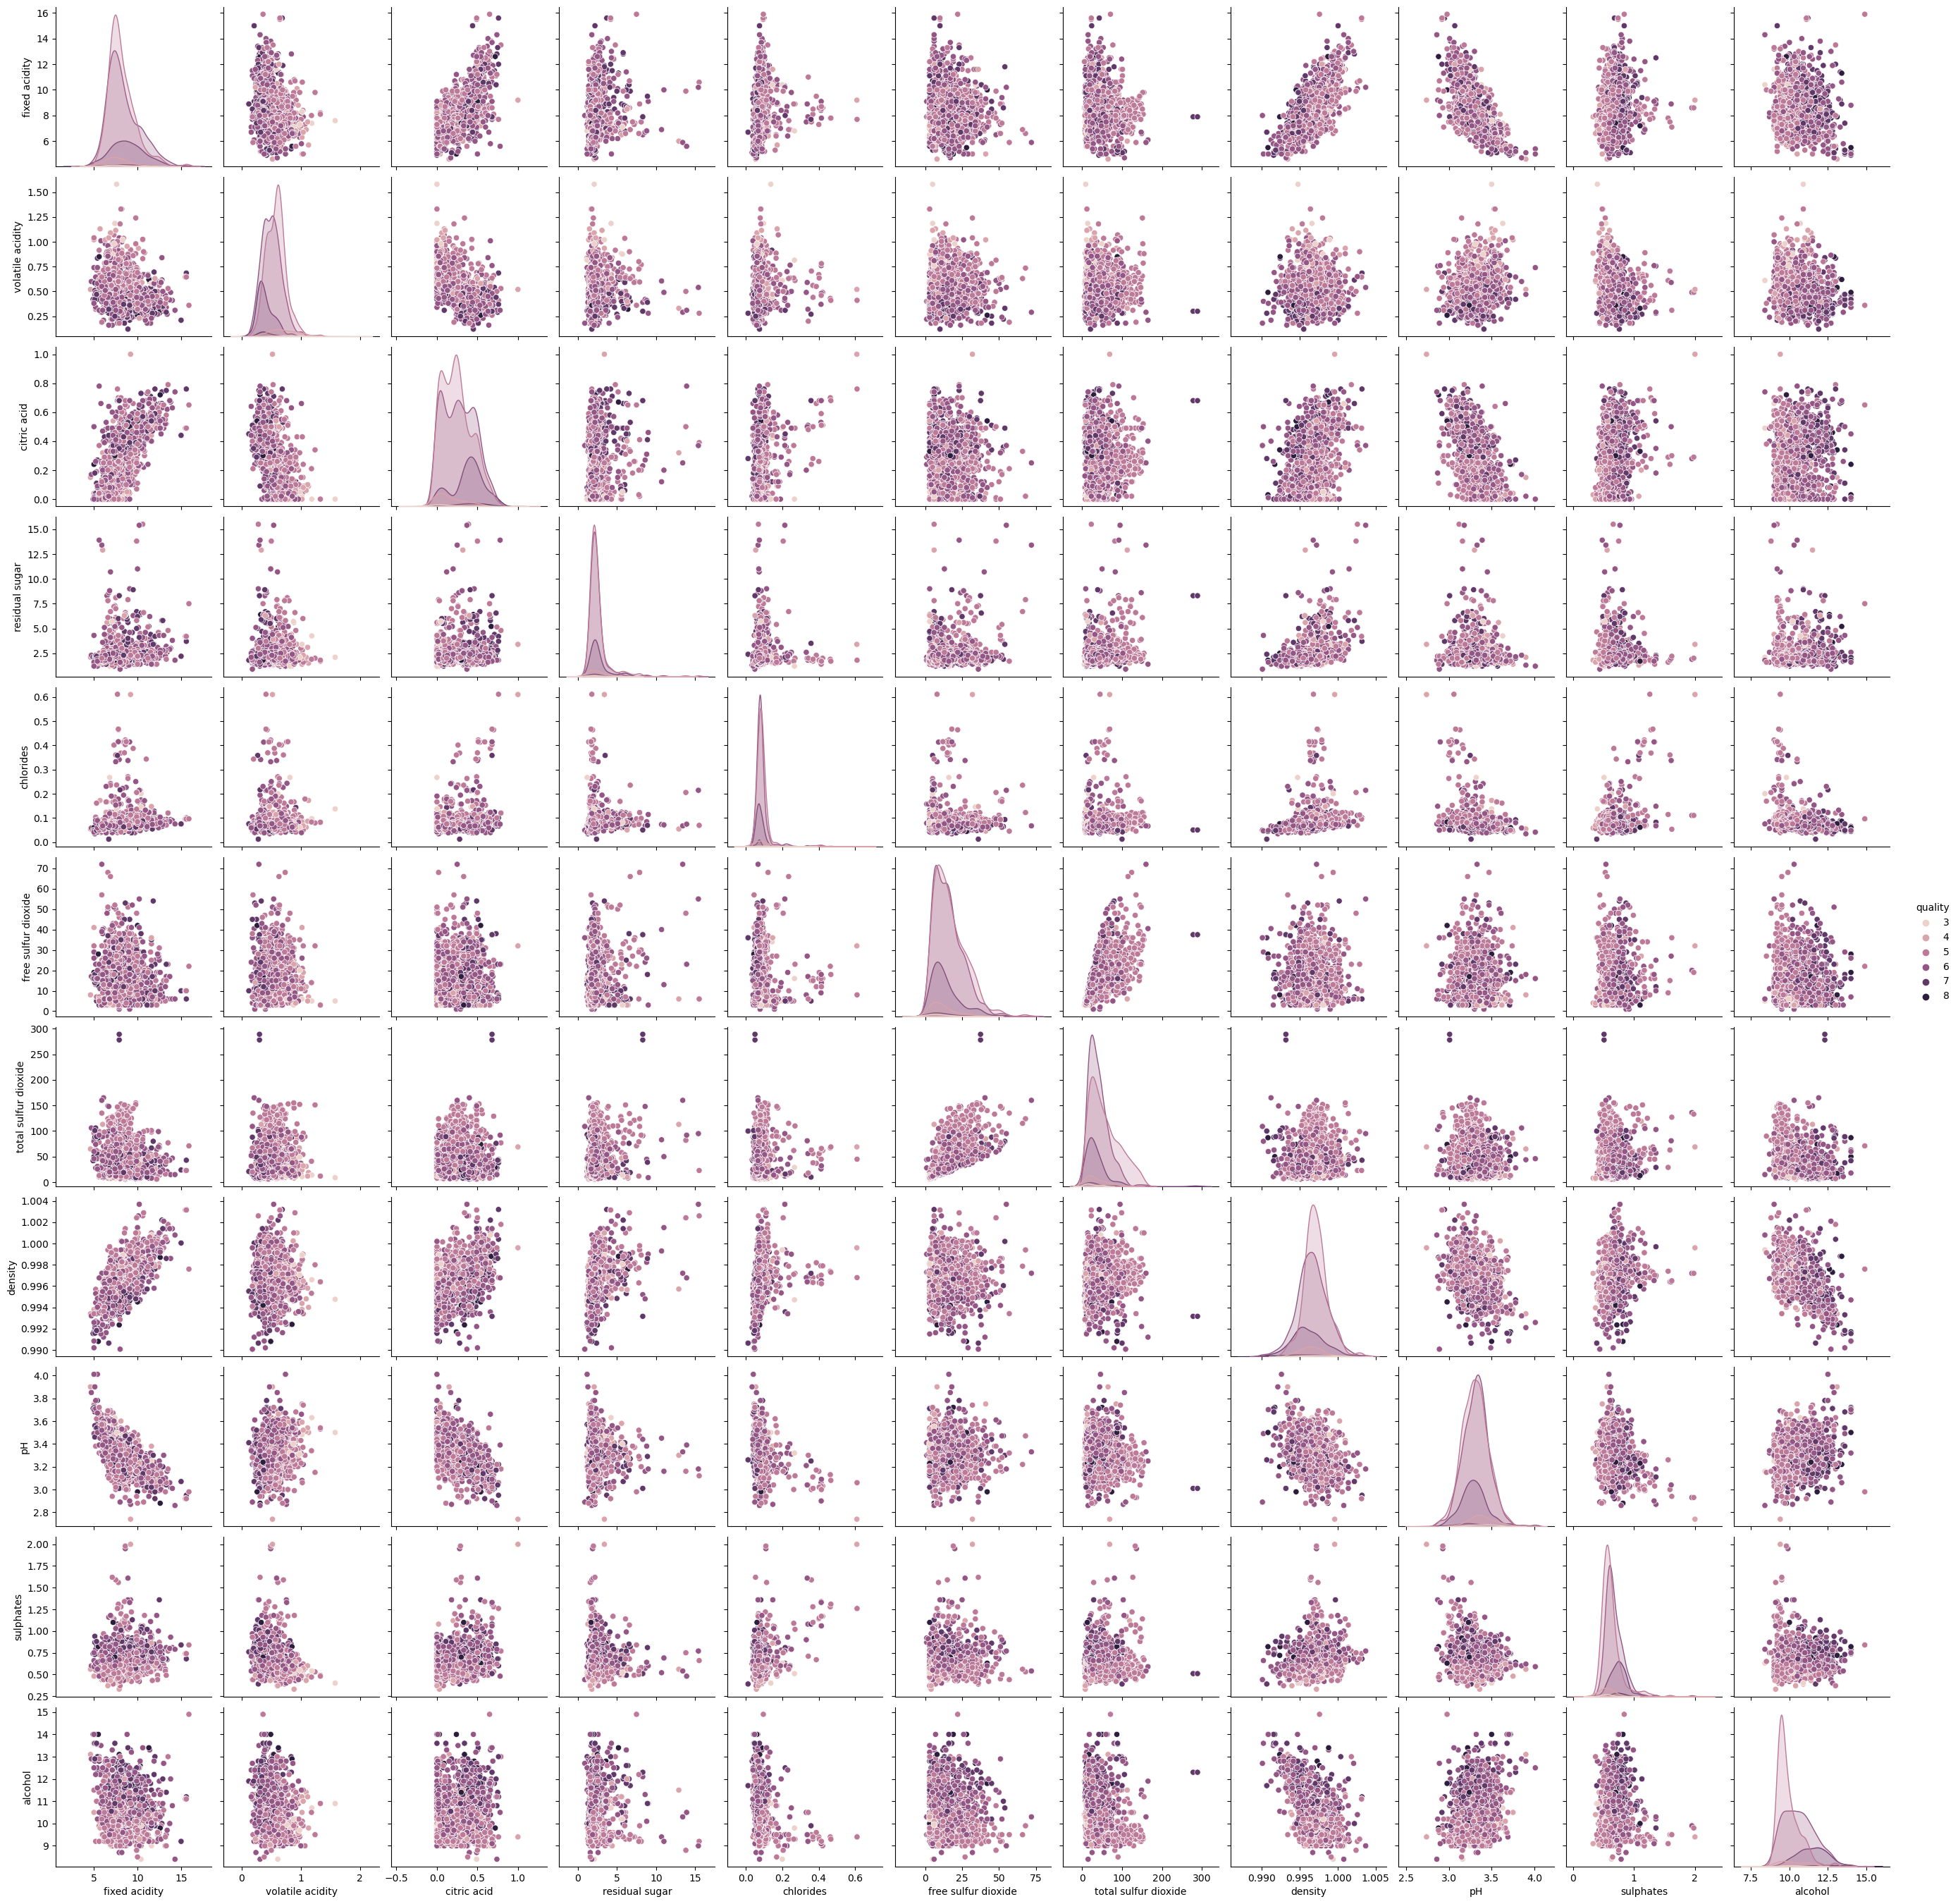

In [34]:
sns.pairplot(wine_data, hue = 'quality')

In [46]:
# max and min
def area(df):
    min_col = {}
    mean_col = {}
    max_col = {}
    
    for col in df:
        max_col[col]= df[col].max()
        min_col[col]= df[col].min()
        mean_col[col]= df[col].mean()

    result = pd.DataFrame([min_col,mean_col, max_col], index=['min','mean', 'max'])
    return result

df = pd.DataFrame(wine_data ,columns=wine_data.columns)
df
area(df)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
min        4.600000          0.120000     0.000000        0.900000   0.012000   
mean       8.319637          0.527821     0.270976        2.538806   0.087467   
max       15.900000          1.580000     1.000000       15.500000   0.611000   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
min              1.000000              6.000000  0.990070  2.740000   
mean            15.874922             46.467792  0.996747  3.311113   
max             72.000000            289.000000  1.003690  4.010000   

      sulphates    alcohol   quality  
min    0.330000   8.400000  3.000000  
mean   0.658149  10.422983  5.636023  
max    2.000000  14.900000  8.000000

## Analysis and Prediction

1. Store the feature in variable `X` except the target variable.

In [6]:
X = wine_data.drop(columns=['quality'])

In [7]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

2. Create a Numpy array from the column quality in the wine_data, by applying the method *`.to_numpy()`* then assign it to variable `Y`.

In [8]:
y = wine_data['quality'].to_numpy()

3. Standardize the data X then reassign it to the variable `X`.



In [9]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

4. Split the wine_data dataset in train and test set, by using the method *`train_test_split()`*. The parameter `test_size = 0.2` and `random_state = 2`

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 2)

In [11]:
print ('Train set:')
print('X-train= ', X_train.shape,'y-train= ',y_train.shape)
print ('Test set:')
print('X-test= ', X_test.shape,  'y-test= ',y_test.shape)

Train set:
X-train=  (1279, 11) y-train=  (1279,)
Test set:
X-test=  (320, 11) y-test=  (320,)


### Prediction
**1. Logistic Regression <br>**
**2. Support Vector Machine<br>**
**3. Decision Tree <br>**
**4. K-Nearest Neighbors <br>**
**5. Random Forest**

#### 1. Logistic Regression

1.1. Create a logistic regression object  then create a  GridSearchCV object  <code>logregg</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [12]:
parameters ={"C":[0.01,0.02,0.03,0.04,0.05,0.06,0.1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logregg = GridSearchCV(estimator =lr ,cv = 3, param_grid = parameters)
logregg.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1],
                         'penalty': ['l2'], 'solver': ['lbfgs']})

1.2. We display the best parameters using the data attribute *`best_params_`* and the accuracy on the validation data using the data attribute *`best_score_`*.

In [29]:
accuracy_log_train = logregg.best_score_
print("tuned hpyerparameters :(best parameters) ",logregg.best_params_)
print("Accuracy on train set using logistic regression :",logregg.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 0.05, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on train set using logistic regression : 0.5996873774523278


1.3. Accuracy on test data

In [31]:
accuracy_log_test = logregg.score(X_test, y_test)
print("Accuracy on test set using Logistic Regression: ",logregg.score(X_test, y_test))


Accuracy on test set using Logistic Regression:  0.59375


1.3. Confusion Matrix

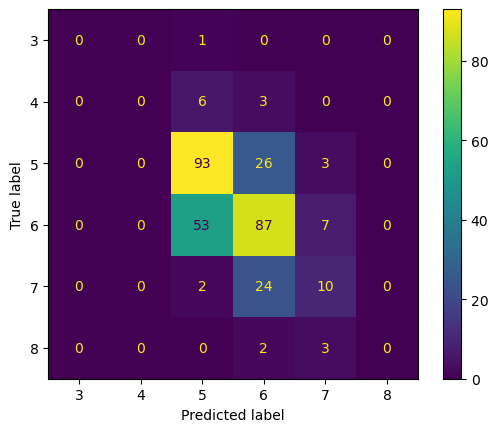

In [15]:
y_pred =logregg.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=logregg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logregg.classes_)
disp.plot()
plt.show()

2.1. Create a support vector machine object.


In [32]:
from sklearn import svm

clf = svm.SVC()

In [36]:
# fit the model on train data
clf.fit(X_train, y_train)
# prediction on test data
y_pred = clf.predict(X_test)

In [37]:
# on train data
accuracy_svc_train = accuracy_score(y_pred, y_test)
print(f'Accuracy on train set using Support Vector Machine Model: ',accuracy_svc_train)

Accuracy on train set using Support Vector Machine Model:  0.609375


2.2. Test the accuracy on test set

In [38]:
accuracy_svc_test = clf.score(X_test, y_test)
print("Accuracy on test set using Support Vector Machine Model :",clf.score(X_test, y_test))


Accuracy on test set using Support Vector Machine Model : 0.609375


2.3. Confusion Matrix

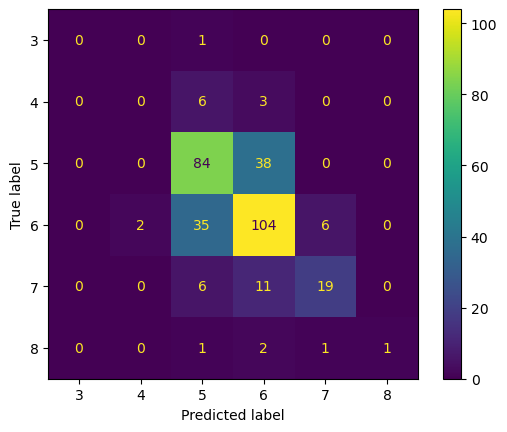

In [62]:
y_pred =svm_cv.predict(X_test)
cm_02 = confusion_matrix(y_test, y_pred, labels=svm_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_02,
                              display_labels=svm_cv.classes_)
disp.plot()
plt.show()

#### 3. Decision Tree

3.1. Create a decision tree classifier object..

In [55]:
from sklearn import tree

tree = DecisionTreeClassifier()

In [58]:
# fit the data on train set
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


3.2. Accuracy on train and test set

In [66]:
# Accuracy on train set
accuracy_dt_train = tree.score(X_train,y_train)
print("Accuracy on train set using Decision Tree :",accuracy_dt_train)

Accuracy on train set using Decision Tree : 1.0


In [67]:
# Accuracy on train set
accuracy_dt_test = tree.score(X_test,y_test)
print("Accuracy on train set using Decision Tree :",accuracy_dt_test)

Accuracy on train set using Decision Tree : 0.596875


**Note: Decision tree are easy to overfit, mean the accuracy on the train data is higher than test data. Therefore using Random forest to overcome the overfiting.**

#### 2. Random Forest

A random forest is a machine learning algorithm that combines multiple decision trees to make predictions. It's a popular method for classification and regression tasks

2.1. Create a random forest object.

In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [71]:
# fit the model on train set

In [72]:
model.fit(X_train,y_train)

RandomForestClassifier()

2.2. Accuracy on train and test data.

In [73]:
y_pred = model.predict(X_test)

accuracy_rf_train = model.score(X_train, y_train)
print("Accuracy on using Random forest on train data: ", accuracy_rf_train)

Accuracy on using Random forest on train data:  1.0


In [75]:
accuracy_rf_test = model.score(X_test, y_test)
accuracy_rf_test

0.69375

#### Plot Between machine learning method and test accuracy

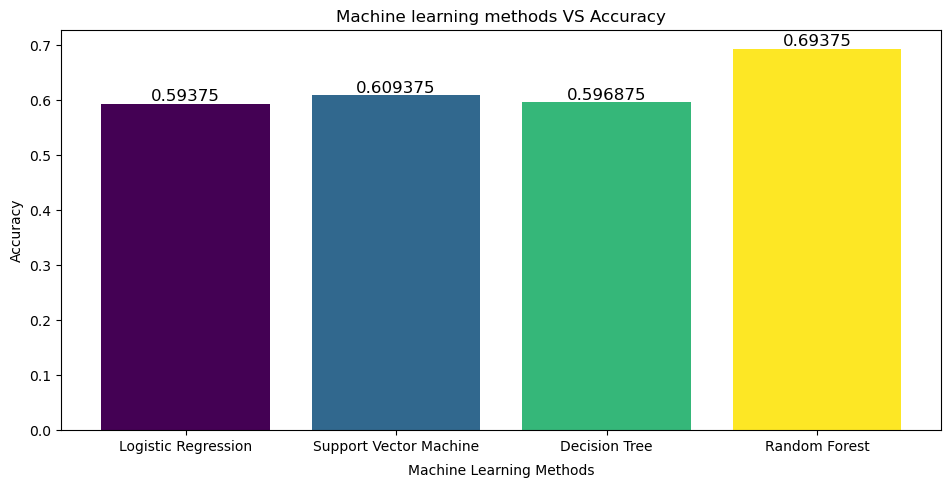

In [88]:
import matplotlib.pyplot as plt

import numpy as np



# Sample Data

methods = np.array(["Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest"])
acc = np.array([accuracy_log_test, accuracy_svc_test, accuracy_dt_test, accuracy_rf_test])




# Generate different colors based on unique labels

colors = plt.cm.viridis(np.linspace(0, 1, len(methods)))  # Using the 'viridis' colormap



# Plot

plt.figure(figsize=(8, 5))

bars = plt.bar(methods, acc, color=colors)



# Add labels on top of bars

for bar in bars:

    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 

             f'{bar.get_height()}', ha='center', va='bottom', fontsize=12)

# Customize plot
plt.xlabel("Machine Learning Methods",labelpad = 7)
plt.ylabel("Accuracy")
plt.title("Machine learning methods VS Accuracy")
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=1.2, bottom=0.1, top=0.9)

plt.show()

## Discussion

There are various ways to solve this problem, Our main goal is to minimize loss function for which, one of the famous algorithm is XGBoost (Extreme boosting) technique which works by building an ensemble of decision trees sequentially where each new tree corrects the errors made by the previous one. It uses advanced optimization techniques and regularization methods that reduce overfitting and improve model performance. 

Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic regression is a statistical algorithm which analyze the relationship between two data factors. The article explores the fundamentals of logistic regression, it’s types and implementations.

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. While it can handle regression problems, SVM is particularly well-suited for classification tasks.
The key idea behind the SVM algorithm is to find the hyperplane that best separates two classes by maximizing the margin between them. This margin is the distance from the hyperplane to the nearest data points (support vectors) on each side.

Decision tree (DT) is supervised machine learning algorithm used for classification and regression task. Usually decision tree are prone to overfit, therefore using the Random forest is more suited for this problem for better accuracy of the model.

Timeline:

Data understanding: Understand the data is really important as it is the begining step of prediction in either for regression or classification task. What features affect the target variable either negatively or positively. we can see the interaction by using correlation matrix.


Data preprocessing: The preprocessing task is contain with many application on the dataset for example, to handle the missing value and remove the outlier from the dataset. Apply the feature engineering so that we would have the more better predicting features.

Exploratory data analysis: visualization the data for the features and identifying trends and potential outliers.

Using the best machine learning model: based on performance of the models




## Conclusion

Choosing the best supervised machine learning method is essential for the model to make accurate prediction. Removing and replacing missing values in the dataset, applying feature engineering so that we would have better predictors (features). For this dataset **`Random forest`** is best suited. Therefore I choose Random forest for this machine learning model.